F:\Uninstall\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


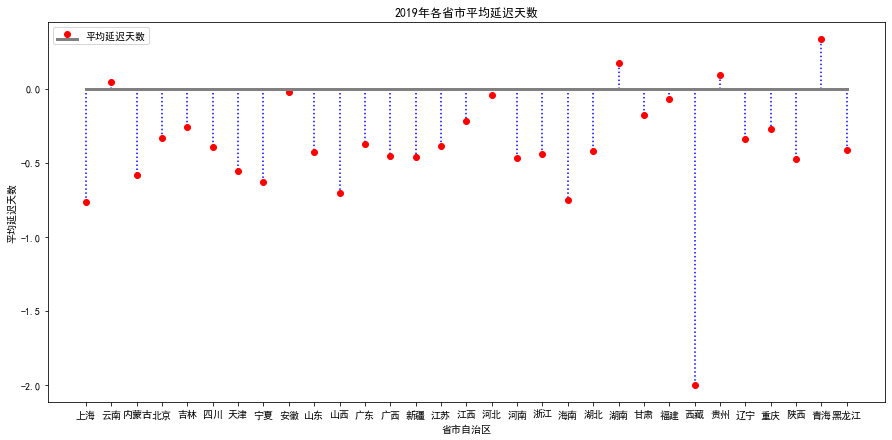

In [2]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
from impala.dbapi import connect
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#连接Hadoop数据库
v1 = []
v2 = []
v3 = []
conn = connect(host='192.168.1.7', port=10000, database='sales',auth_mechanism='NOSASL',user='root')
cursor = conn.cursor()

#读取Hadoop订单表数据
sql_num = "SELECT province,avg(datediff(deliver_date,order_date)-planned_days) FROM orders WHERE dt=2019 GROUP BY province"
cursor.execute(sql_num)
sh = cursor.fetchall()
for s in sh:
    v1.append(s[0])
    v2.append(s[1])

plt.figure(figsize=(15,7))       #设置图形大小
label = "平均延迟天数"
markerline, stemlines, baseline = plt.stem(v1, v2, label=label)

plt.setp(markerline, color='red', marker='o')
plt.setp(stemlines, color='blue', linestyle=':')
plt.setp(baseline, color='grey', linewidth=3, linestyle='-')

plt.xlabel('省市自治区')
plt.ylabel('平均延迟天数')
plt.title('2019年各省市平均延迟天数')
plt.legend()
plt.show()